In [38]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
# use 'usecols' to retrive only selected columns
# here type column only
# and nrows=10, as we only want 10 rows from dataset
type_data = pd.read_csv("googleplaystore.csv", usecols=['Type'], nrows=10)

In [6]:
type_data.shape

(10, 1)

# Step 1: Checking for null values, and if there is null values in dataset, then deal with them.

In [7]:
# checking for null values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# first approach is to delete all rows which contain minimum one null value
df = data.dropna()

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Step 2: Deal with numeric values first

## Q1. Finding average rating

In [10]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [11]:
int(sum(df['Rating']))

39235

In [12]:
int(sum(df['Rating']))/9360

4.191773504273504

In [34]:
# we also use interpolate() to fill nan values with mean of before and after number of na values
# df['Rating'].interpolate()

## Q2. How many apps there with rating 5?

In [14]:
df['App'][df['Rating']==5].shape

(274,)

In [15]:
count = 0
for i in df['Rating']:
    if i == 5:
        count+=1
count

274

## Average app reviewes

In [16]:
s = 0
for i in df['Reviews']:
    s += int(i)
s

4814565961

In [17]:
int(s/len(df['Reviews']))

514376

# Categorical Data

## Q1. Total number of categories

In [18]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [19]:
len(df['Category'].unique())

33

## Q2. How many applications are in category of ART_AND_DESIGN

In [20]:
df[df['Category']=='ART_AND_DESIGN'].shape[0]

61

## Q3. How many types of applications are there?

In [21]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

## Q4. How many applications are free and how many are paids?

In [22]:
free_apps = df[df['Type']=='Free'].shape[0]

In [23]:
paid_apps = df[df['Type']=='Paid'].shape[0]

In [24]:
total_apps = free_apps + paid_apps

In [25]:
print(int(free_apps/total_apps*100), "% are free applications")
print((100 - int(free_apps/total_apps*100)), "% are paid applications")

93 % are free applications
7 % are paid applications


In [26]:
free_apps/total_apps

0.9310897435897436

## Q5. Name of all the contain ratings

In [27]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [28]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# Go to some advance insights...

## Q1. Total number of apps in each category

In [29]:
categories = {}
for name in df['Category'].unique():
    count = 0
    for i in df['Category']:
        if i == name:
            count+=1
    categories[name] = count

In [30]:
categories

{'ART_AND_DESIGN': 61,
 'AUTO_AND_VEHICLES': 73,
 'BEAUTY': 42,
 'BOOKS_AND_REFERENCE': 178,
 'BUSINESS': 303,
 'COMICS': 58,
 'COMMUNICATION': 328,
 'DATING': 195,
 'EDUCATION': 155,
 'ENTERTAINMENT': 149,
 'EVENTS': 45,
 'FINANCE': 323,
 'FOOD_AND_DRINK': 109,
 'HEALTH_AND_FITNESS': 297,
 'HOUSE_AND_HOME': 76,
 'LIBRARIES_AND_DEMO': 64,
 'LIFESTYLE': 314,
 'GAME': 1097,
 'FAMILY': 1746,
 'MEDICAL': 350,
 'SOCIAL': 259,
 'SHOPPING': 238,
 'PHOTOGRAPHY': 317,
 'SPORTS': 319,
 'TRAVEL_AND_LOCAL': 226,
 'TOOLS': 733,
 'PERSONALIZATION': 312,
 'PRODUCTIVITY': 351,
 'PARENTING': 50,
 'WEATHER': 75,
 'VIDEO_PLAYERS': 160,
 'NEWS_AND_MAGAZINES': 233,
 'MAPS_AND_NAVIGATION': 124}

## Q2. Total number of apps in each type

In [31]:
types = {}
for name in df['Type'].unique():
    count = 0
    for i in df['Type']:
        if i == name:
            count+=1
    types[name] = count
types

{'Free': 8715, 'Paid': 645}

## Q3. Total number of content ratings

In [32]:
ratings = {}
for name in df['Content Rating'].unique():
    count = 0
    for i in df['Content Rating']:
        if i == name:
            count+=1
    ratings[name] = count
ratings

{'Everyone': 7414,
 'Teen': 1084,
 'Everyone 10+': 397,
 'Mature 17+': 461,
 'Adults only 18+': 3,
 'Unrated': 1}

# Now let's check outliers

### There are three major ways to finding outliers
    * i)   Using z-score
    * ii)  using the percentile
    * iii) using the interquartile range

## Using z-score
    * We only apply z-score when there is normal distribution,
    so we first check which column has normal distribution.

C:\Users\Kamlesh Baviskar\AppData\Local\Temp\ipykernel_8748\2160066058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

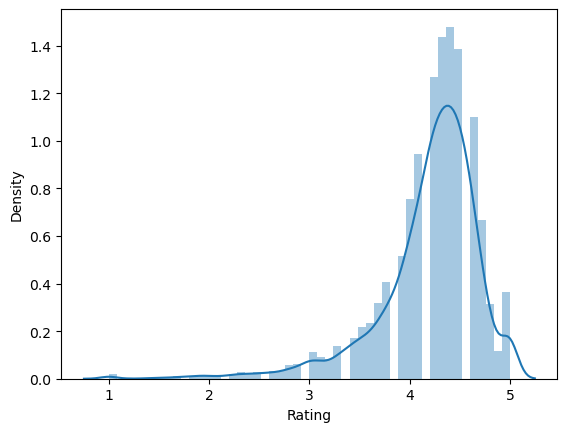

In [39]:
sns.distplot(df['Rating'])

<Axes: >

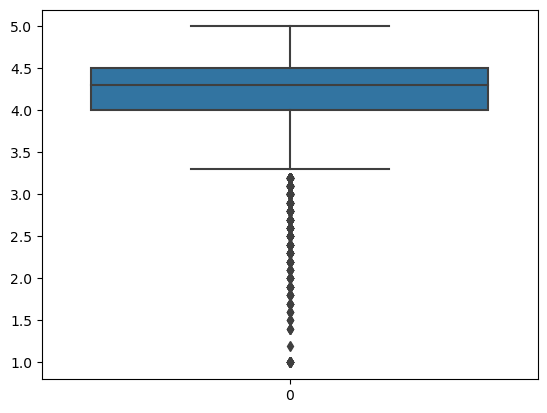

In [40]:
sns.boxplot(df['Rating'])